In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dateparse = lambda x: pd.to_datetime(x, format="%Y-%m-%d %H:%M:%S%z")  # pd.datetime.strptime

# all_users = pd.read_csv('../data/all_users.csv')
# users_activities = pd.read_csv('../data/users_activity.csv')
# sample_tweets = pd.read_csv('../data/sample_tweets.csv')

users = pd.read_csv("../data/all_users.csv",
                    parse_dates=['created_at'],
                    converters={"user_id": str})
tweets = pd.read_csv("../data/sample_tweets.csv", #path/to/tweets_file
                     # nrows = 400000,
                     parse_dates=['created_at'],
                     converters={"user_id": str,
                                 "tweet_id": str},
                     date_parser=dateparse,
                     lineterminator='\n')
activity = pd.read_csv("../data/users_activity.csv", #path/to/activity_file/
                       converters={"user_id": str})

core_users_ids = pd.read_csv("../data/core_users.csv",
                             converters={"user_id": str})


# Filtra il dataframe per includere solo le righe in cui l'user_id è presente nella lista dei core users
core_users = users[users["user_id"].isin(core_users_ids["user_id"])]


C:\Users\davis\AppData\Local\Temp\ipykernel_19300\3575629005.py:11: DtypeWarning: Columns (2,3,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  users = pd.read_csv("../data/all_users.csv",
C:\Users\davis\AppData\Local\Temp\ipykernel_19300\3575629005.py:14: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  tweets = pd.read_csv("../data/sample_tweets.csv", #path/to/tweets_file


In [25]:
core_users.head()
# activity.head()
# tweets.head()

7010
7010


,user_id,created_at,user_screen_name,name,nbr_followers,nbr_followings,nbr_liked_tweets,nbr_lists,nbr_tweets,verified,protected,location,description,nbr_accounts,nbr_usernames
11102,841318992094605313,2017-03-13 16:04:13+00:00,dg080310,Donato G.🇮🇹#ICEUTNE#,210.0,486.0,49.0,0.0,3.0,False,False,NaN,Monza Lombardia 🏎 ...,1.0,2.0
22702,1218242063638188033,2020-01-17 18:42:36+00:00,Fidelio16852684,Fidelio,0.0,0.0,97.0,0.0,8.0,False,False,NaN,NaN,1.0,1.0
36236,1311952044144685056,2020-10-02 08:52:58+00:00,IlS0vran,ilS0vranIsta,36.0,35.0,1.0,1.0,17.0,False,False,NaN,NaN,1.0,1.0
43382,52021947,2009-06-29 10:46:16+00:00,marcobobabo,Marco D'Addabbo,10.0,167.0,368.0,0.0,24.0,False,False,"Milano, Lombardia",puglioemilianmilanestesista. il dottor house è...,1.0,1.0
64474,1298360422433730560,2020-08-25 20:43:52+00:00,Sararisso3,APOCALYPTO. IL SONNO DELLA RAGIONE GENERA MOSTRI.,46.0,25.0,0.0,0.0,52.0,False,False,NaN,"Raga, bro, con la 3° guerra mondiale possiamo ...",1.0,1.0


## Credibility

### Number of followers

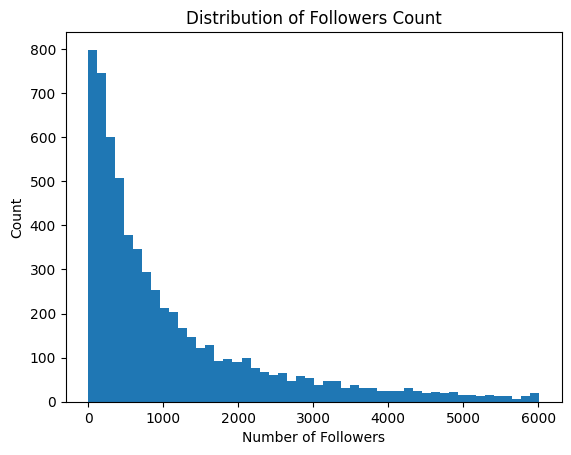

In [46]:
# core_users_copy = core_users.copy()
#core_users_copy['log_followers'] = np.log10(core_users_copy['nbr_followers'] + 1)

plt.hist(core_users['nbr_followers'], bins=50, range=(0, core_users['nbr_followers'].quantile(0.90)))
plt.xlabel('Number of Followers')
plt.ylabel('Count')
plt.title('Distribution of Followers Count')
plt.show()

### Number of followings

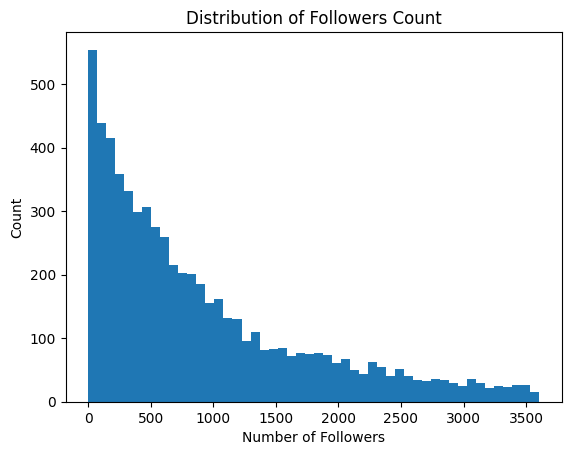

In [47]:
plt.hist(core_users['nbr_followings'], bins=50, range=(0, core_users['nbr_followings'].quantile(0.90)))
plt.xlabel('Number of Followers')
plt.ylabel('Count')
plt.title('Distribution of Followers Count')
plt.show()

### Favorites Ratio

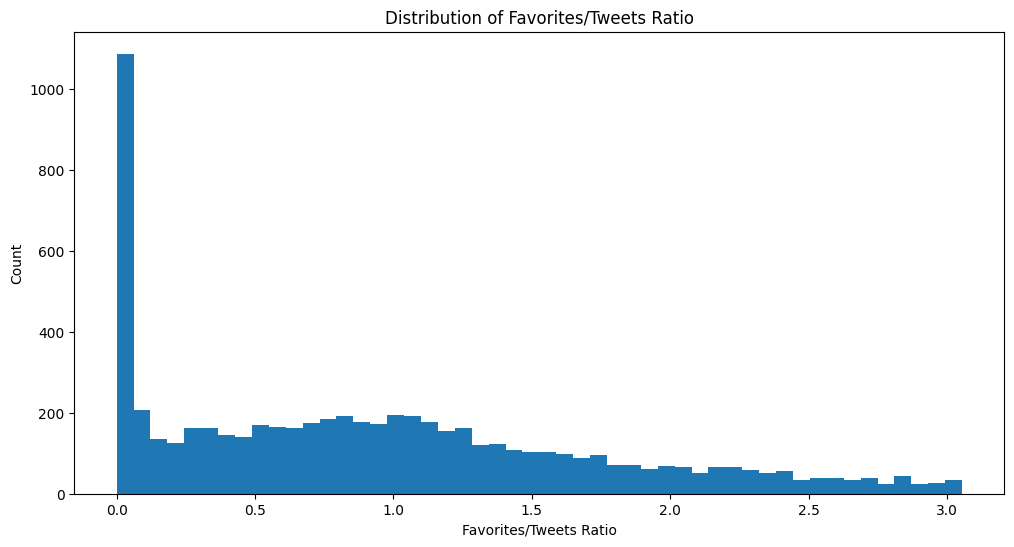

In [56]:
core_users_credibility = core_users.copy()

core_users_credibility['favorites_ratio'] = core_users_credibility['nbr_liked_tweets'] / core_users_credibility['nbr_tweets'].replace(0, np.nan)

plt.figure(figsize=(12, 6))

plt.hist(core_users_credibility['favorites_ratio'].dropna(), bins=50, range=(0, core_users_credibility['favorites_ratio'].quantile(0.90)))
plt.xlabel('Favorites/Tweets Ratio')
plt.ylabel('Count')
plt.title('Distribution of Favorites Ratio')
plt.show()

### Followers Ratio

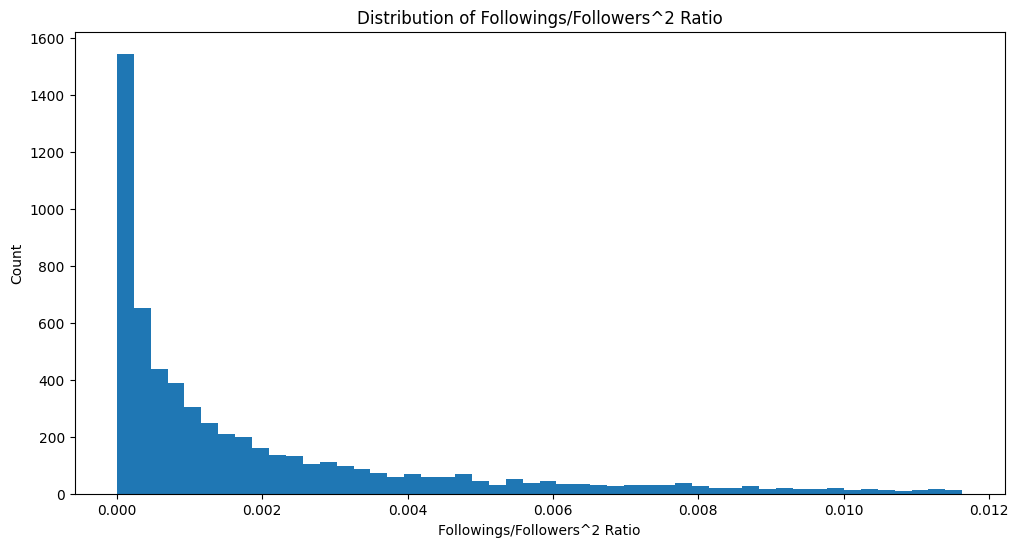

In [58]:
core_users_credibility = core_users.copy()

core_users_credibility['followers_ratio'] = core_users_credibility['nbr_followings'] / (core_users_credibility['nbr_followers']**2 + 1)

plt.figure(figsize=(12, 6))

plt.hist(core_users_credibility['followers_ratio'].dropna(), bins=50, range=(0, core_users_credibility['followers_ratio'].quantile(0.85)))
plt.xlabel('Followings/Followers^2 Ratio')
plt.ylabel('Count')
plt.title('Distribution of Followers Ratio')
plt.show()


### Following Ratio

C:\Users\davis\AppData\Local\Temp\ipykernel_19300\1006020006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_users['created_at'] = pd.to_datetime(core_users['created_at'])


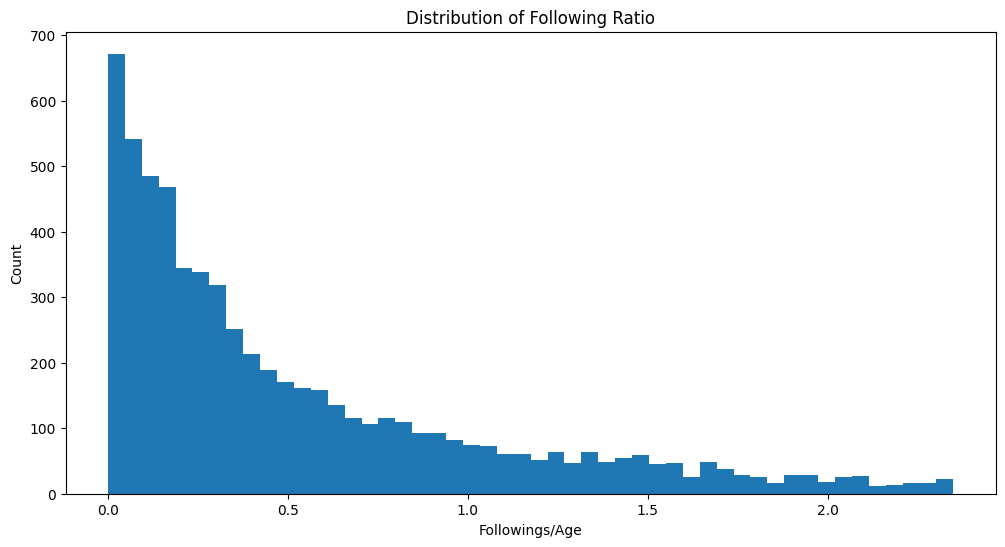

In [94]:
core_users['created_at'] = pd.to_datetime(core_users['created_at'])
core_users_credibility = core_users.copy()

# Tweet più recente
current_date = tweets['created_at'].max()

# Controllo che siano tutti tz-naive o tz-aware
core_users_credibility['created_at'] = pd.to_datetime(core_users_credibility['created_at']).dt.tz_localize(None)
current_date = current_date.tz_localize(None)

core_users_credibility['age'] = (current_date - core_users['created_at']).dt.days
core_users_credibility['following_ratio'] = core_users_credibility['nbr_followings'] / (core_users_credibility['age'])

plt.figure(figsize=(12, 6))

plt.hist(core_users_credibility['following_ratio'].replace([np.inf, -np.inf], np.nan).dropna(), bins=50, range=(0, core_users_credibility['following_ratio'].quantile(0.90)))
plt.xlabel('Followings/Age')
plt.ylabel('Count')
plt.title('Distribution of Following Ratio')
plt.show()


### Tweet Ratio

C:\Users\davis\AppData\Local\Temp\ipykernel_19300\1003030289.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  core_users['created_at'] = pd.to_datetime(core_users['created_at'])


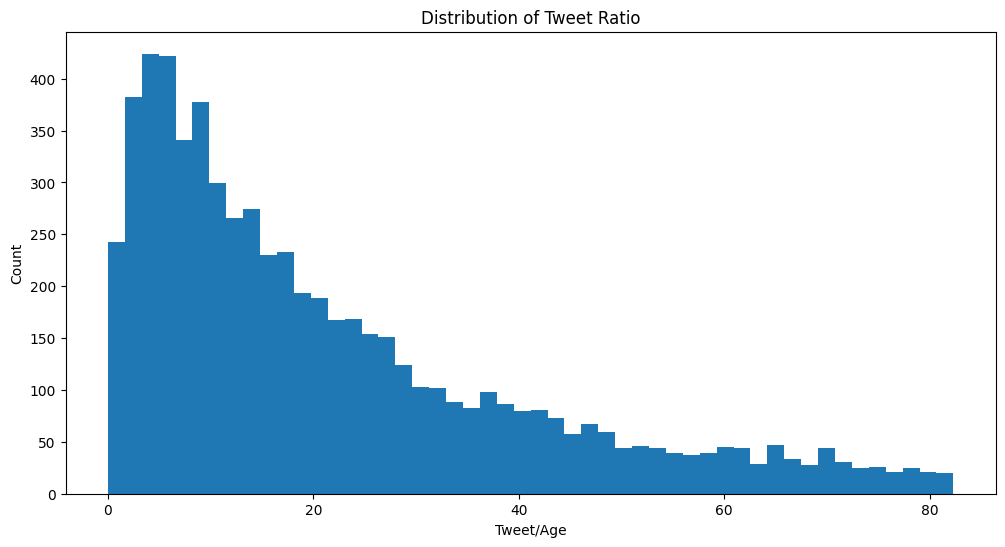

In [96]:
core_users['created_at'] = pd.to_datetime(core_users['created_at'])
core_users_credibility = core_users.copy()

# Tweet più recente
current_date = tweets['created_at'].max()

# Controllo che siano tutti tz-naive o tz-aware
core_users_credibility['created_at'] = pd.to_datetime(core_users_credibility['created_at']).dt.tz_localize(None)
current_date = current_date.tz_localize(None)

core_users_credibility['age'] = (current_date - core_users['created_at']).dt.days
core_users_credibility['tweet_ratio'] = core_users_credibility['nbr_tweets'] / (core_users_credibility['age'])

plt.figure(figsize=(12, 6))

plt.hist(core_users_credibility['tweet_ratio'].replace([np.inf, -np.inf], np.nan).dropna(), bins=50, range=(0, core_users_credibility['tweet_ratio'].quantile(0.90)))
plt.xlabel('Tweet/Age')
plt.ylabel('Count')
plt.title('Distribution of Tweet Ratio')
plt.show()


## Initiative

### Retweet Ratio

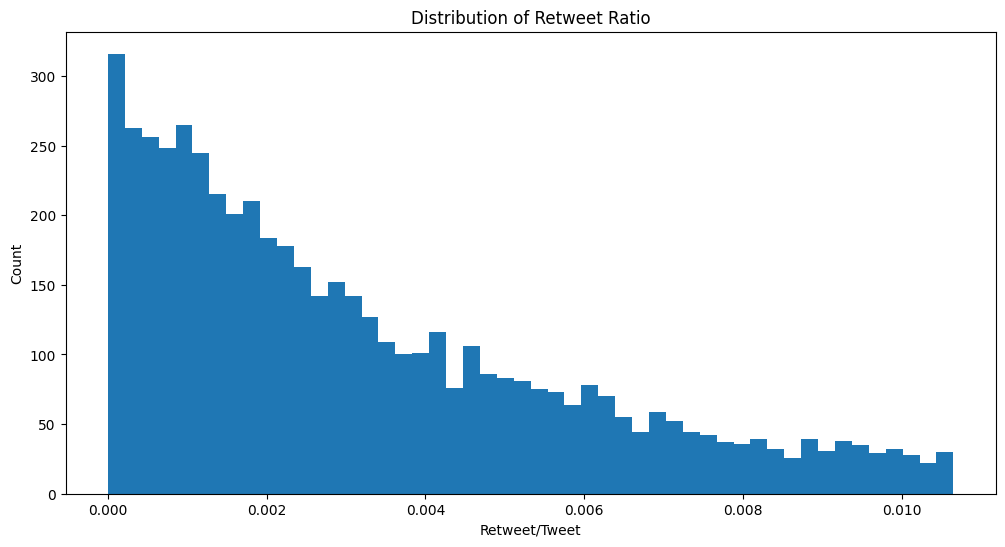

In [82]:
core_users_initiative = core_users.copy()

# Numero di retweets effettuato da ogni utente

# Filtra i tweet che sono retweets
retweets = tweets[tweets['is_retweet']==1]
# Filtra retweets da core_user
core_users_retweets = retweets[retweets['user_id'].isin(core_users_initiative['user_id'])]
# Conteggio numero retweets per ogni core_user
retweets_count = core_users_retweets['user_id'].value_counts()


# Numero di volte che i tweet di ogni utente sono stati ritwittati

# # Filtra retweets dei core_user
# core_user_tweets = tweets[tweets['user_id'].isin(core_users['user_id'])]
# # Calcolo del numero totale di retweets per ogni core_user
# retweets_received_count = core_user_tweets.groupby('user_id')['retweet_count'].sum()


# Trasformazione retweets_count in un DataFrame
retweets_count_df = retweets_count.reset_index()
# Rinomina delle colonne
retweets_count_df.columns = ['user_id', 'retweets_count']
# Unione retweets_count_df con core_users
core_users_initiative = pd.merge(core_users_initiative, retweets_count_df, on='user_id', how='left')

core_users_initiative['retweet_ratio'] = core_users_initiative['retweets_count'] / (core_users_initiative['nbr_tweets'])

plt.figure(figsize=(12, 6))

plt.hist(core_users_initiative['retweet_ratio'].dropna(), bins=50, range=(0, core_users_initiative['retweet_ratio'].quantile(0.85)))
plt.xlabel('Retweet/Tweet')
plt.ylabel('Count')
plt.title('Distribution of Retweet Ratio')
plt.show()


### Replay Ratio

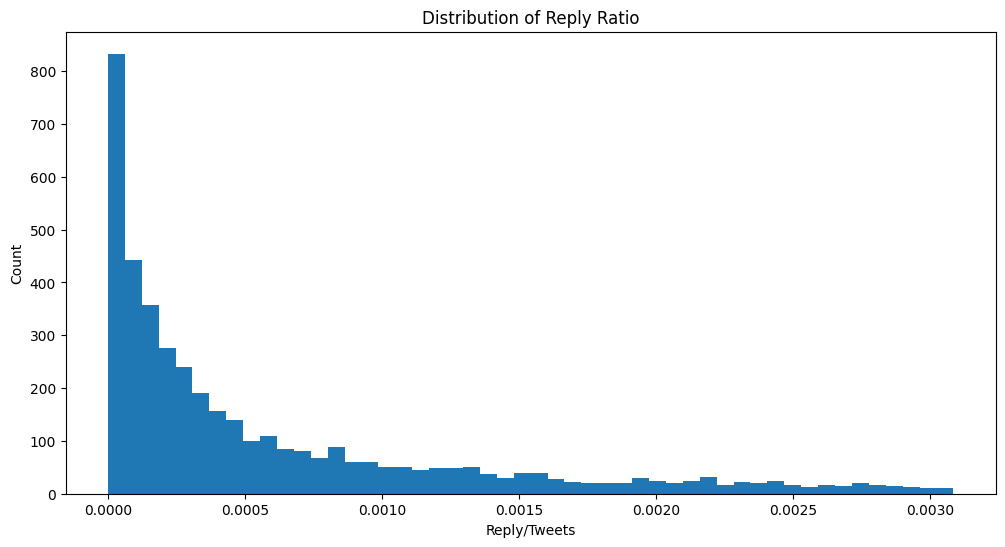

In [81]:
core_users_initiative = core_users.copy()

# Numero di risposte effettuate da ogni core_users

# Filtro tweets effettuati solo da core_users
filtered_tweets = tweets[tweets["user_id"].isin(core_users["user_id"])]
# Calcolo numero totale di risposte per ogni user
replies_count = filtered_tweets[filtered_tweets['in_reply_to_user_id'].notna()].groupby('user_id').size()
# Unione replies_count con core_users
core_users_initiative = pd.merge(core_users_initiative, replies_count.rename('reply_count'), how='left', on='user_id')


# Numero di risposte ricevute da ogni core_users

# replies_received_count = filtered_tweets[filtered_tweets['in_reply_to_user_id'].notna()].groupby('in_reply_to_user_id').size()


core_users_initiative['retweet_ratio'] = core_users_initiative['reply_count'] / (core_users_initiative['nbr_tweets'])

plt.figure(figsize=(12, 6))

plt.hist(core_users_initiative['retweet_ratio'].dropna(), bins=50, range=(0, core_users_initiative['retweet_ratio'].quantile(0.85)))
plt.xlabel('Reply/Tweets')
plt.ylabel('Count')
plt.title('Distribution of Reply Ratio')
plt.show()


## Adaptability

### Time between tweets

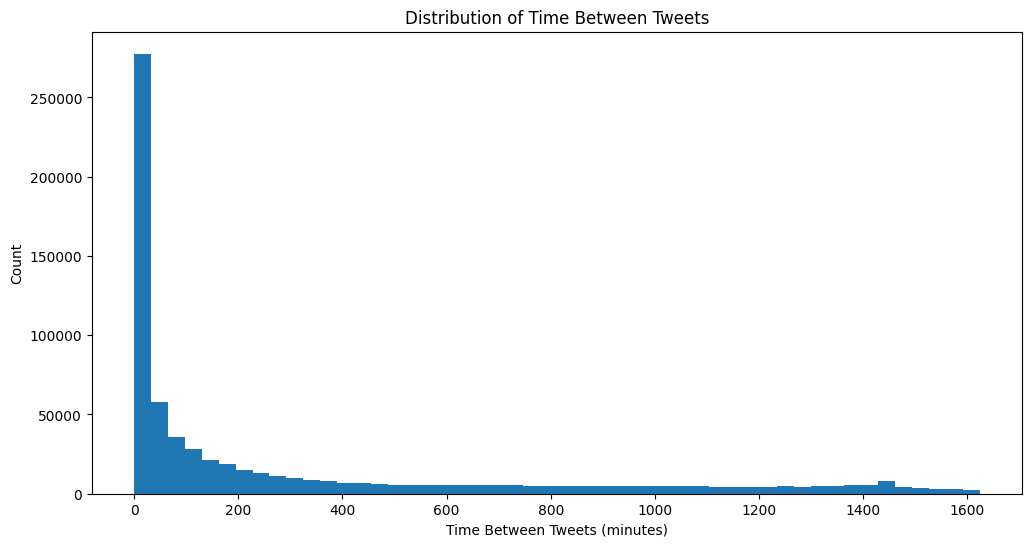

In [107]:
# Filtraggio solo i tweet da core_users e non retweet
core_users_tweets = tweets[(tweets['user_id'].isin(core_users['user_id'])) & (tweets['is_retweet'] == 0)]

# Ordine tweet per core_users e data di creazione
core_users_tweets_sorted = core_users_tweets.sort_values(by=['user_id', 'created_at'])

# Calcolo della differenza di tempo tra tweet consecutivi per ogni core_users
core_users_tweets_sorted['time_between_tweets'] = core_users_tweets_sorted.groupby('user_id')['created_at'].diff()

# Conversione della differenza di tempo in minuti
core_users_tweets_sorted['time_between_tweets'] = core_users_tweets_sorted['time_between_tweets'].dt.total_seconds() / 60


plt.figure(figsize=(12, 6))

plt.hist(core_users_tweets_sorted['time_between_tweets'].dropna(), bins=50, range=(0, core_users_tweets_sorted['time_between_tweets'].quantile(0.85)))
plt.xlabel('Time Between Tweets (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Between Tweets')
plt.show()


### Time between retweets

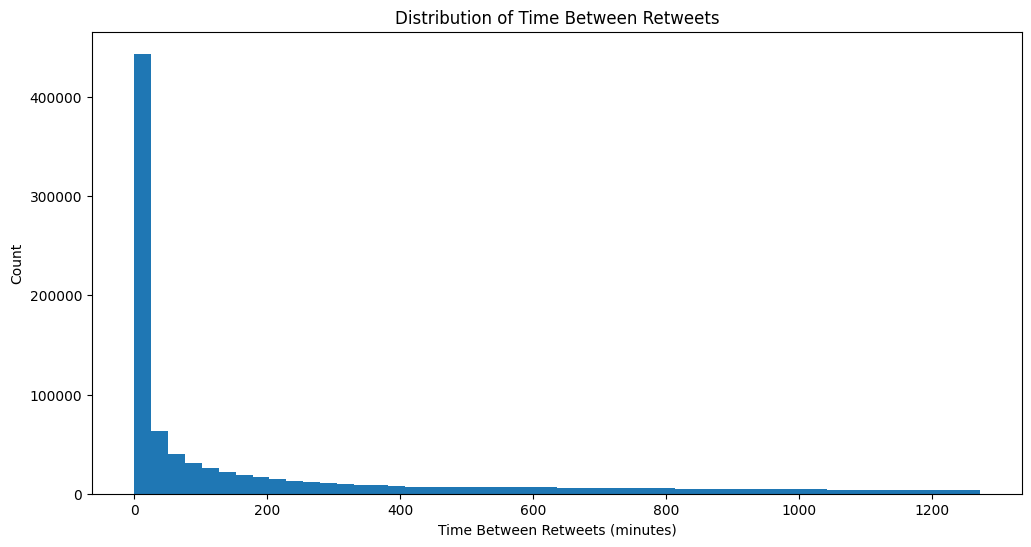

In [109]:
# Filtraggio solo i tweet da core_users e non retweet
core_users_retweets = tweets[(tweets['user_id'].isin(core_users['user_id'])) & (tweets['is_retweet'] == 1)]

# Ordine tweet per core_users e data di creazione
core_users_retweets_sorted = core_users_retweets.sort_values(by=['user_id', 'created_at'])

# Calcolo della differenza di tempo tra tweet consecutivi per ogni core_users
core_users_retweets_sorted['time_between_tweets'] = core_users_retweets_sorted.groupby('user_id')['created_at'].diff()

# Conversione della differenza di tempo in minuti
core_users_retweets_sorted['time_between_tweets'] = core_users_retweets_sorted['time_between_tweets'].dt.total_seconds() / 60


plt.figure(figsize=(12, 6))

plt.hist(core_users_retweets_sorted['time_between_tweets'].dropna(), bins=50, range=(0, core_users_retweets_sorted['time_between_tweets'].quantile(0.85)))
plt.xlabel('Time Between Retweets (minutes)')
plt.ylabel('Count')
plt.title('Distribution of Time Between Retweets')
plt.show()
